# Group Deku Project.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Royal Car Dealers has a car yard. They primarily sell new cars but hope to expand into used car sales like other yards. There is a large market for used cars. Because of the large price difference between new and used cars, many people prefer to buy used. There is a scarcity of information available to consumers about the relationship between used car prices and mileage. As a result, consumers may end up paying more or less for a used car than it is actually worth, resulting in financial losses or missed savings opportunities. This issue disproportionately affects first-time car buyers or those with limited knowledge of the used car market.

> **Problem Statement:** The goal of this project is to forecast the price of used cars.

### b) Defining the Metric for Success

> Having a model that accurately  predicts used car prices.

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [52]:
#importing relevant libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import re
from scipy.stats import levene
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
# Loading the Data 
# Dataset url = https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
car_details_df = pd.read_csv("Car details v3.csv")
car_df = car_details_df.copy()
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0




## 3. Data Understanding

In [54]:
# Determining the no. of records in our dataset
car_df.shape

(8128, 13)

In [55]:
car_df[["selling_price"]]

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


In [56]:
# Previewing the bottom of our dataset
car_df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [57]:
# Exploring the descriptive statistics of the variables
car_df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [58]:
# Checking for data set info
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [59]:
# Checking for Outliers
outliers_df = car_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
outliers_df

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
90%,2018.000000,1.025000e+06,1.200000e+05,7.000000
95%,2019.000000,1.950000e+06,1.500000e+05,7.000000
99%,2019.000000,5.200000e+06,2.250000e+05,9.000000


In [60]:
# Identifying the Missing Data
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [61]:
# Dropping rows with Missing Data
car_df.dropna(inplace=True)

In [62]:
#Confirm if there are any missing values.
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [63]:
# Identifying the Duplicated Data
car_df.duplicated().sum()

1189

In [64]:
#Dropping duplicated data.
car_df.drop_duplicates(inplace=True)

In [65]:
#Confirm if there are any duplicates.
car_df.duplicated().sum()

0

In [66]:
#checking the dimensions of the new data frame.
car_df.shape

(6717, 13)

In [67]:
# More data cleaning procedures
#creating a function that strips and converts non-numerical data types to numericals.
def replace_data(data, to_replace, value, col):
    """replace values in the given column"""
    car_df[col].replace(to_replace, value,inplace = True, regex = True)
replace_data(car_df, "CC", "", "engine")
car_df["engine"] = car_df["engine"].astype(float)

In [68]:
#calling our function.
replace_data(car_df, "km/kg", "", "mileage")
replace_data(car_df, "kmpl", "", "mileage")
car_df["mileage"] = car_df["mileage"].astype(float)

In [69]:
#calling our function.
replace_data(car_df, "bhp", "", "max_power")
car_df["max_power"] = car_df["max_power"].astype(float)

In [70]:
# converting selling_price column from Indian rupee to USD
car_df["selling_price"] = round((car_df["selling_price"]/82),2)

In [71]:
#striping torque
def findFirstFloat(string):
    return re.findall(r"[-+]?(?:\d*\.*\d+)", string)[0]

car_df["torque"] = car_df["torque"].apply(findFirstFloat)
car_df["torque"] = car_df["torque"].astype(float)

In [72]:
#spliting car brand
company_name = car_df['name'].apply(lambda x : x.split(' ')[0])
car_df.insert(1,"company_name",company_name)
car_df.drop(['name'],axis=1,inplace=True)

In [73]:
#create new column for "car age"
from datetime import datetime

def yearTransform(year):
    return datetime.now().year - year

#calling the function
car_df["year"] = car_df["year"].apply(yearTransform)

In [74]:
#confirming change of data types to floats.
df = car_df
car_df.dtypes

company_name      object
year               int64
selling_price    float64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

In [75]:
car_df.isnull().sum()

company_name     0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64



## 6. Exploratory Analysis

In [76]:
# plt.figure(figsize=[17,5])
# plt.subplot(1,3,1)
# sns.barplot(car_df['seller_type'], car_df['selling_price'])
# plt.title('selling Price Vs Seller Type')

# plt.subplot(1,3,2)
# sns.barplot(car_df1['transmission'],car_df['selling_price'])
# plt.title('Selling Price Vs Transmission')

# plt.subplot(1,3,3)
# sns.barplot(car_df['fuel'],car_df['selling_price'])
# plt.title('Selling Price Vs Fuel Type')

# plt.show()

Selling Price of cars seems to have higher prices when sold by Dealers.
Selling Price would be higher for cars that are Automatic. 
Selling Price of cars with Fuel Type of Diesel is higher than Petrol, CNG  and LPG

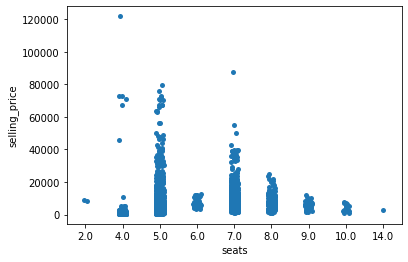

In [77]:
#correlation between selling_price and seats
sns.stripplot(data=car_df, x=car_df['seats'], y=car_df['selling_price']);

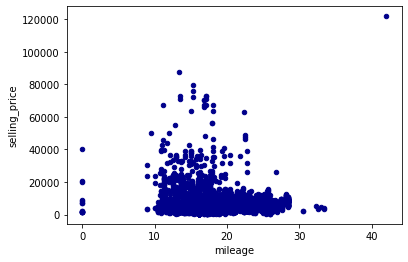

In [78]:
#correlation between selling price and mileage 
ax1 = car_df.plot.scatter(x='mileage',
                       y='selling_price',
                       c='DarkBlue')

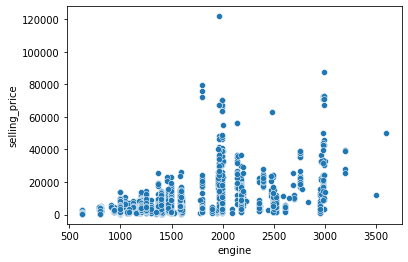

In [79]:
#correlation between engine and selling price
sns.scatterplot(data=car_df, x=car_df['engine'], y=car_df['selling_price']);

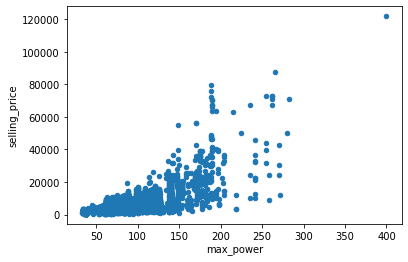

In [80]:
#correlation between maximum power and selling price
ax = car_df.plot.scatter(x='max_power', y='selling_price')

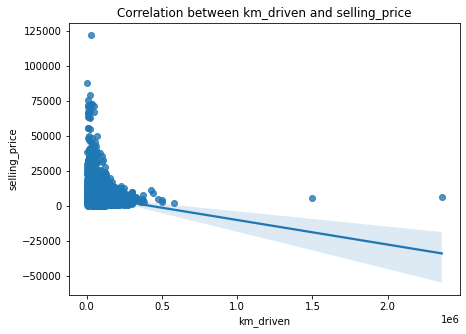

In [81]:
#Correlation between km_driven and selling_price
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between km_driven and selling_price')
sns.regplot(x='km_driven', y='selling_price',data=car_df);

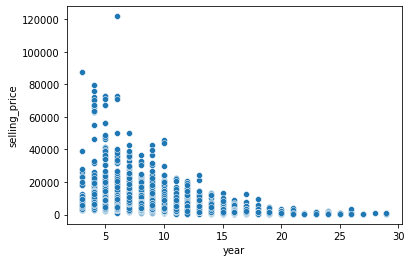

In [82]:
#correlation between model year and selling price
sns.scatterplot(data=car_df, x=car_df['year'], y=car_df['selling_price']);

In [83]:
# T transposes the table
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6717.0,9.388864,3.897402,3.00,6.00,9.00,12.00,29.00
selling_price,6717.0,6419.341395,6384.761619,365.84,3048.78,5121.95,7926.83,121951.22
km_driven,6717.0,73398.337651,58703.275270,1.00,38000.00,68203.00,100000.00,2360457.00
mileage,6717.0,19.466585,4.048102,0.00,16.80,19.44,22.50,42.00
engine,6717.0,1430.985857,493.469198,624.00,1197.00,1248.00,1498.00,3604.00
max_power,6717.0,87.766100,31.724555,32.80,67.10,81.83,100.00,400.00
torque,6717.0,160.854853,91.630280,4.80,96.00,146.00,200.00,789.00
seats,6717.0,5.434271,0.983805,2.00,5.00,5.00,5.00,14.00


### outliers

>Using the numpy.percentile() method to compute the values of Q1 and Q3. In addition, we replaced the outliers with numpy.nan as NULL values.
After we've replaced the outliers with nan, we can use the code below to calculate the sum of null or missing values.

In [84]:
# numerical columns
num_cols = car_df.select_dtypes(exclude = ['object'])

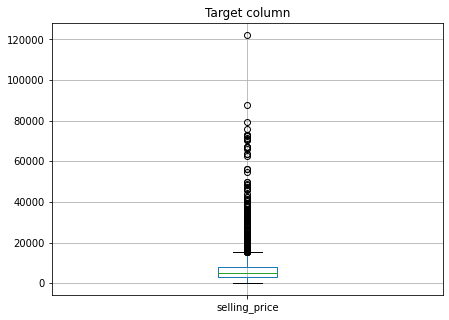

In [85]:
fig=plt.figure(figsize=(7,5))
car_df.boxplot("selling_price")
plt.title("Target column")
plt.show()

In [86]:
#remove outliers
def outlierRemover(df,num_cols):
    for x in [num_cols]:
        q75,q25 = np.percentile(car_df.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    return df

In [87]:
# numercal columns to drop outliers
columns = ["year","selling_price","km_driven","mileage","engine","max_power","torque"]

for c in columns:
    outlierRemover(car_df, c)

In [88]:
NewCarDf = car_df.dropna()
NewCarDf.shape

(5331, 13)

In [89]:
NewCarDf.year.describe()

count    5331.000000
mean        9.129432
std         3.672081
min         3.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        21.000000
Name: year, dtype: float64

In [90]:
categorical_columns = ["owner","seller_type","company_name","fuel","seller_type","transmission","seats", "engine"]

# creating instance of labelencoder
labelencoder = LabelEncoder()

for c in categorical_columns:
    NewCarDf[c] = labelencoder.fit_transform(NewCarDf[c])

NewCarDf


,company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,8,9.0,5487.80,145500.0,1,1,1,0,23.40,23,74.00,190.0,1
1,12,9.0,4512.20,120000.0,1,1,1,2,21.14,44,103.52,250.0,1
2,4,17.0,1926.83,140000.0,3,1,1,3,17.70,43,78.00,12.7,1
3,5,13.0,2743.90,127000.0,1,1,1,0,23.00,34,90.00,22.4,1
4,8,16.0,1585.37,120000.0,3,1,1,0,16.10,24,88.20,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,8,10.0,3170.73,50000.0,3,1,1,2,18.90,8,67.10,90.0,1
8122,5,9.0,5792.68,80000.0,1,1,1,2,22.54,34,88.73,219.7,1
8123,5,10.0,3902.44,110000.0,3,1,1,0,18.50,20,82.85,113.7,1
8124,5,16.0,1646.34,119000.0,1,1,1,1,16.80,40,110.00,24.0,1


In [91]:
NewCarDf.shape

(5331, 13)

## 7. Implementing the Solution

#### correlations

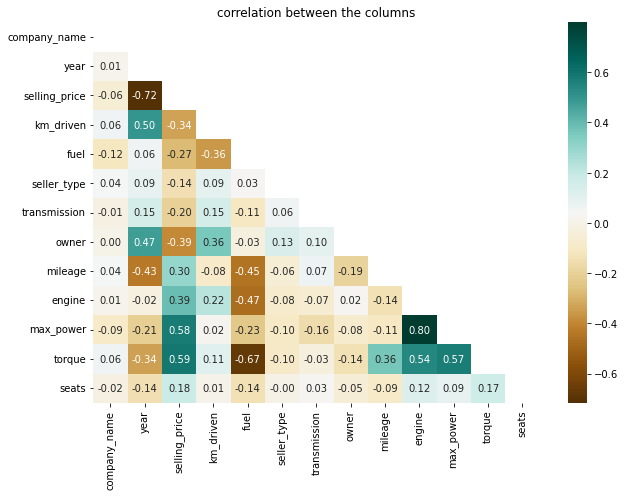

In [92]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(NewCarDf.corr(), dtype=bool))
sns.heatmap(NewCarDf.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('correlation between the columns')
plt.show()

#### check for multicollinearity  using VIF

In [93]:
# the independent variables set
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = NewCarDf.drop(labels=['selling_price'],axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
pd.DataFrame(vif_data).sort_values(by=['VIF'], ascending=False)

,feature,VIF
9,max_power,76.993171
7,mileage,33.054099
5,transmission,19.201134
10,torque,18.976877
8,engine,17.408316
1,year,12.626894
3,fuel,12.560426
4,seller_type,10.480769
2,km_driven,6.765973
0,company_name,5.653597


#### normality

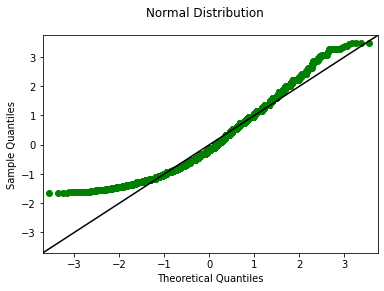

In [94]:
from statsmodels.stats.stattools import jarque_bera

# Plot
fig, ax = plt.subplots()
sm.graphics.qqplot(NewCarDf["selling_price"], dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

#### linearity

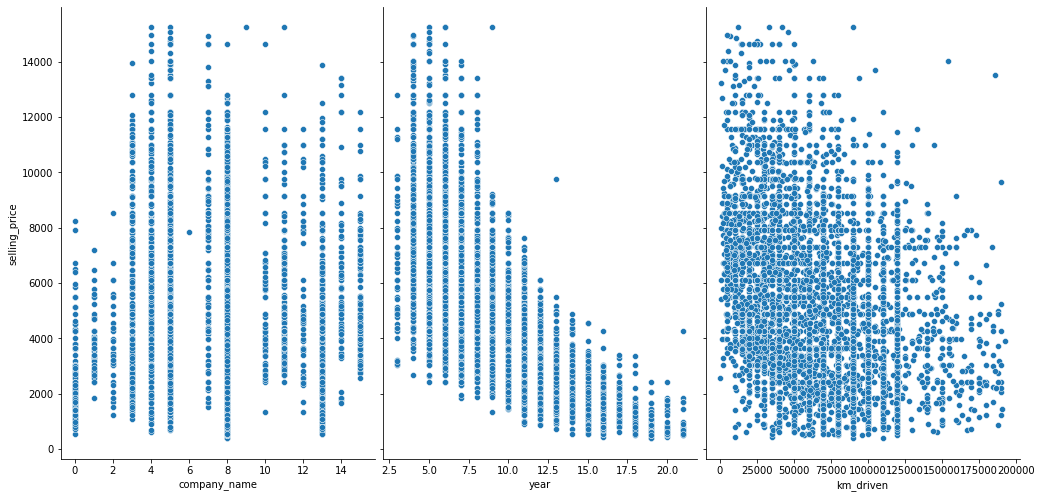

In [95]:
p = sns.pairplot(NewCarDf, x_vars=['company_name','year','km_driven',
                                   ], y_vars='selling_price', size=7, aspect=0.7)


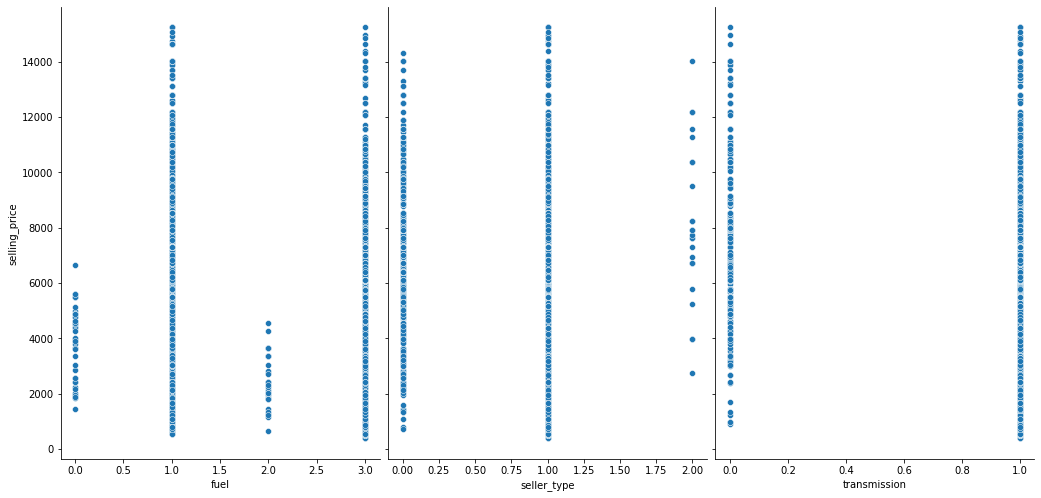

In [96]:
p = sns.pairplot(NewCarDf, x_vars=['fuel','seller_type','transmission'], y_vars='selling_price', size=7, aspect=0.7)


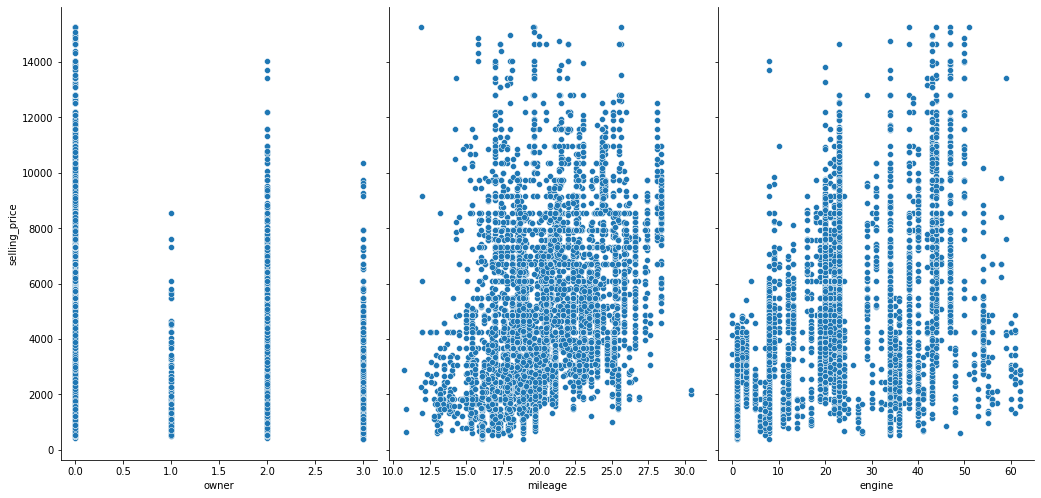

In [97]:
p = sns.pairplot(NewCarDf, x_vars=['owner','mileage','engine'], y_vars='selling_price', size=7, aspect=0.7)


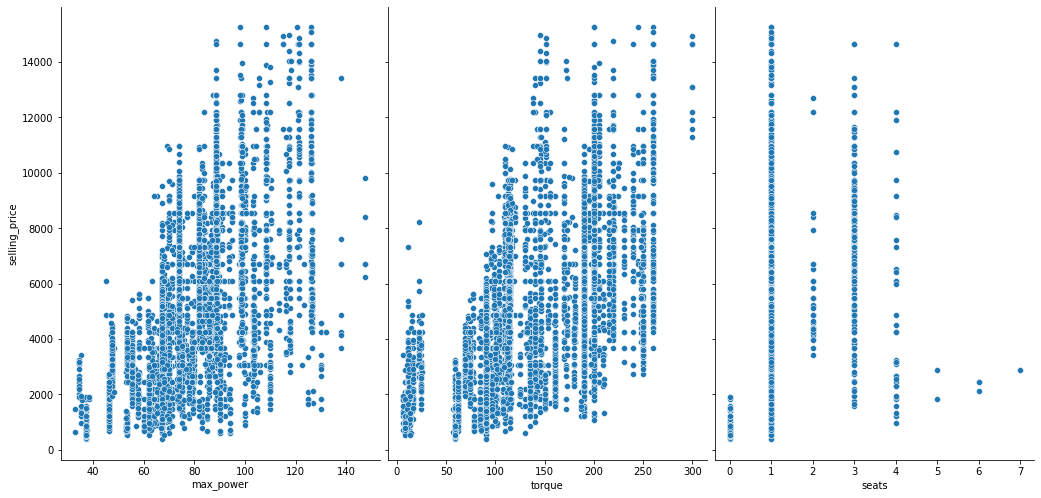

In [98]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(NewCarDf, x_vars=['max_power','torque','seats'], y_vars='selling_price', size=7, aspect=0.7)


## Modeling 

In [99]:
# creting model variables
df = NewCarDf.copy(deep=True)

# predictors
X = df.drop(labels=['selling_price'],axis=1)

# our target variable will be alcoholic content.
y = df["selling_price"]

### Using statmodel

### scaling the df to Std.Normal distribution

>We use StandardScaler from sklearn.preprocessing to normalize each predictor to mean 0 and unit variance.

In [100]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [101]:
df.columns

Index(['company_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats'],
      dtype='object')

In [104]:
df_scaled = ss.fit_transform(df[df.columns])
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0.204153,-0.035251,0.106800,2.070919,-1.039409,0.289758,0.237656,-0.727425,0.840962,-0.069556,-0.287306,0.828746,-0.245669
1,1.380100,-0.035251,-0.231073,1.408858,-1.039409,0.289758,0.237656,1.139644,0.149352,1.399101,1.255107,1.784631,-0.245669
2,-0.971794,2.143554,-1.126449,1.928122,0.944156,0.289758,0.237656,2.073178,-0.903366,1.329165,-0.078307,-1.995894,-0.245669
3,-0.677808,1.054152,-0.843478,1.590601,-1.039409,0.289758,0.237656,-0.727425,0.718554,0.699741,0.548690,-1.841359,-0.245669
4,0.204153,1.871204,-1.244704,1.408858,0.944156,0.289758,0.237656,-0.727425,-1.393002,0.000380,0.454641,-2.015012,-0.245669


In [105]:
# # round the numbers for dispaly
df_scaled.describe().round(3)

,company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.148,-1.669,-1.661,-1.707,-2.031,-3.083,-4.208,-0.727,-3.042,-1.678,-2.440,-2.107,-1.999
25%,-0.678,-0.852,-0.780,-0.798,-1.039,0.290,0.238,-0.727,-0.659,-0.769,-0.648,-0.764,-0.246
50%,0.204,-0.308,-0.168,-0.149,0.944,0.290,0.238,-0.727,-0.077,-0.070,-0.031,-0.350,-0.246
75%,0.204,0.782,0.698,0.630,0.944,0.290,0.238,1.140,0.719,0.770,0.482,0.829,-0.246
max,2.262,3.233,3.486,3.304,0.944,3.662,0.238,2.073,3.001,2.658,3.553,2.581,10.274


### Train and Split

In [106]:
X_scaled = df_scaled.drop(labels="selling_price",axis=1)

y_scaled = df_scaled[["selling_price"]]

In [107]:
Xscaled_train, Xscaled_test, yscaled_train, yscaled_test = \
train_test_split(X_scaled, y_scaled, test_size=0.33)

### Train model

In [108]:
model = LinearRegression()
model.fit(Xscaled_train, yscaled_train)

LinearRegression()

In [109]:
cdf_scaled = pd.DataFrame(model.coef_[0], 
                          index=Xscaled_train.columns, columns=['coefficients'])
cdf_scaled

,coefficients
company_name,-0.030325
year,-0.475357
km_driven,-0.117800
fuel,-0.125821
seller_type,-0.019252
transmission,-0.064852
owner,-0.078473
mileage,0.001905
engine,-0.045730
max_power,0.387223


In [110]:
model.intercept_

array([0.00017005])

>From the table above, we notice max_power has more influence on the Price than other variables. This was not apparent before scaling the data. Further this corroborates the correlation matrix produced during exploratory data analysis.

### Model validation

In [111]:
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model

In [112]:
# check shape of our yscaled
yscaled_train.shape

(3571, 1)

In [113]:
Xscaled_train = sm.add_constant(Xscaled_train)
sm_ols = linear_model.OLS(yscaled_train, Xscaled_train) # i know, the param order is inverse
sm_model = sm_ols.fit()

In [114]:
# getting model
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     876.1
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:35:45   Log-Likelihood:                -2636.2
No. Observations:                3571   AIC:                             5298.
Df Residuals:                    3558   BIC:                             5379.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.008      0.020      0.984      -0.016       0.017
company_name    -0.0303      0.009     -3.503      0.000      -0.047      -0.013
year            -0.4754      0.013    -36.489      0.000      -0.501      -0.450
km_driven       -0.1178      0.011    -10.447      0.000      -0.140      -0.096
fuel            -0.1258      0.017     -7.567      0.000      -0.158      -0.093
seller_type     -0.0193      0.009     -2.256      0.024      -0.036      -0.003
transmission    -0.0649      0.009     -7.328      0.000      -0.082      -0.047
owner           -0.0785      0.010     -7.948      0.000      -0.098      -0.059
mileage          0.0019      0.013      0.147      0.883      -0.023       0.027
engine          -0.0457      0.018     -2.480      0.013      -0.082      -0.010
max_power        0.3872      0.018     21.372      0.000       0.352       0.423
torque           0.1389      0.016      8.808      0.000       0.108       0.170
seats            0.0415      0.009      4.621      0.000       0.024       0.059
==============================================================================
Omnibus:                      210.836   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.410
Skew:                           0.545   Prob(JB):                     1.29e-61
Kurtosis:                       3.835   Cond. No.                         5.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict for unkown values using the model

In [115]:
yscaled_predicted = model.predict(Xscaled_test)
residuals_scaled = yscaled_test - yscaled_predicted

### Evaluate model using charts
>In addition to the numerical metrics used above, we need to look at the distribution of residuals to evaluate if the model.

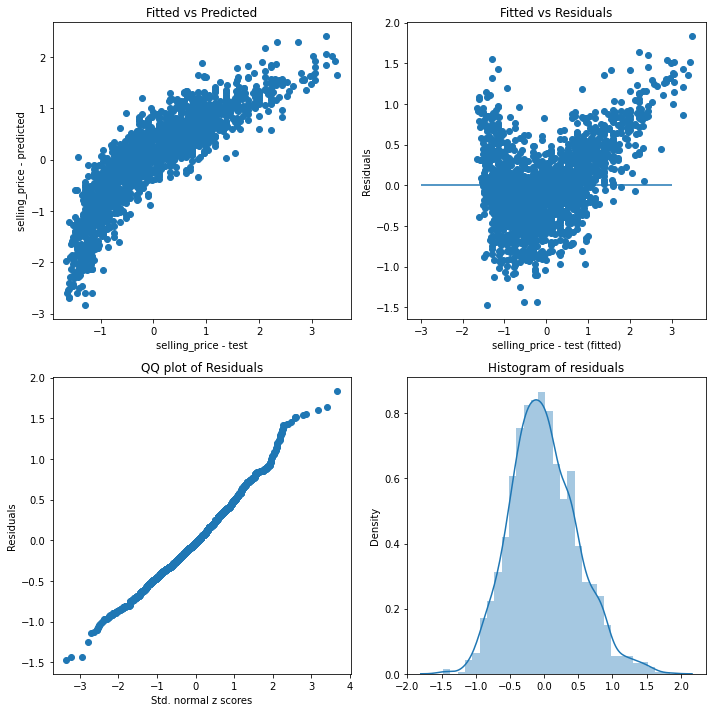

In [116]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
# plt.tight_layout()

plt1 = axs[0][0].scatter(x=yscaled_test, y=yscaled_predicted)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('selling_price - test')
axs[0][0].set_ylabel('selling_price - predicted')

plt2 = axs[0][1].scatter(x=yscaled_test, y=residuals_scaled)
axs[0][1].hlines(0, xmin=-3, xmax=3)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('selling_price - test (fitted)')
axs[0][1].set_ylabel('Residuals')

from numpy import random
axs[1][0].scatter(x=sorted(random.randn(len(residuals_scaled))), 
                  y=sorted(residuals_scaled['selling_price']))
axs[1][0].set_title('QQ plot of Residuals')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

sns.distplot(residuals_scaled, ax=axs[1][1])
axs[1][1].set_title('Histogram of residuals')
plt.tight_layout()
plt.show()

#### From the charts above,

>Fitted vs predicted chart shows a strong correlation between the predictions and actual values
Fitted vs Residuals chart shows an even distribution around the 0 mean line. There are not patterns evident, which means our model does not leak any errors
Quantile-Quantile plot of residuals vs std. normal and the histogram of residual plots show a sufficiently normal distribution of residuals.
**Thus all assumptions hold good.**

### calculate RMSE

In [117]:
# Inverse Transform the scaled data

In [118]:
Xscaled_train.columns

Index(['const', 'company_name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [119]:
df_fitted = Xscaled_test[Xscaled_test.columns]
df_fitted['s_price'] = yscaled_test
df_fitted.head()

,company_name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,s_price
4051,2.262061,-0.579952,-0.668196,0.944156,0.289758,0.237656,1.139644,-1.362399,-0.139492,-0.287306,-0.445767,-0.245669,-0.125490
2026,0.204153,-0.852303,-0.356638,0.944156,0.289758,0.237656,-0.727425,0.299303,-1.118596,-0.653054,-0.764396,-0.245669,-0.104371
3687,-2.147742,-0.579952,-0.875902,-1.039409,0.289758,0.237656,-0.727425,-0.750354,-0.069556,-0.300891,0.549946,5.014019,0.465796
2923,0.204153,1.598853,0.889595,0.944156,0.289758,0.237656,2.073178,-1.025775,-0.908788,-0.809803,-2.061213,-0.245669,-1.455879
3750,0.204153,-0.852303,-0.798012,0.944156,0.289758,0.237656,-0.727425,1.238792,-1.608148,-1.682374,-1.098955,-0.245669,-0.484482


In [121]:
df_fitted_inv = ss.inverse_transform(df_fitted)
df_fitted_inv = pd.DataFrame(df_fitted_inv, 
                                    columns=df_fitted.columns)
df_fitted_inv.head().round(3)

,company_name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,s_price
0,15.0,7.0,3250.020,102101.493,2.34,0.985,1.203,-0.680,20.196,19.886,70.967,122.560,1.069
1,8.0,6.0,4149.635,102101.493,2.34,0.985,0.783,1.100,16.997,14.657,64.869,122.560,1.081
2,0.0,7.0,2650.277,25702.344,2.34,0.985,0.783,-0.025,20.425,19.692,90.024,452.706,1.406
3,8.0,15.0,7748.096,102101.493,2.34,0.985,1.413,-0.320,17.682,12.415,40.049,122.560,0.310
4,8.0,6.0,2875.181,102101.493,2.34,0.985,0.783,2.106,15.397,-0.061,58.466,122.560,0.864


In [125]:
yinv_predicted = (yscaled_predicted * ss.scale_[-1]) + ss.mean_[-1]

In [126]:
yinv_predicted.shape

(1760, 1)

In [127]:
df_fitted_inv['selling_price_predicted'] = yinv_predicted
df_fitted_inv.head().round(3)

,company_name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,s_price,selling_price_predicted
0,15.0,7.0,3250.020,102101.493,2.34,0.985,1.203,-0.680,20.196,19.886,70.967,122.560,1.069,1.070
1,8.0,6.0,4149.635,102101.493,2.34,0.985,0.783,1.100,16.997,14.657,64.869,122.560,1.081,1.163
2,0.0,7.0,2650.277,25702.344,2.34,0.985,0.783,-0.025,20.425,19.692,90.024,452.706,1.406,1.585
3,8.0,15.0,7748.096,102101.493,2.34,0.985,1.413,-0.320,17.682,12.415,40.049,122.560,0.310,0.146
4,8.0,6.0,2875.181,102101.493,2.34,0.985,0.783,2.106,15.397,-0.061,58.466,122.560,0.864,0.953


### Calculate RMSE

>RMSE root mean squared error. This is useful as it tell you in terms of the dependent variable, what the mean error in prediction is.

In [128]:

mse_scaled = metrics.mean_squared_error(df_fitted_inv['s_price'], 
                           df_fitted_inv['selling_price_predicted'])
np.sqrt(mse_scaled)
101796.27442079457

101796.27442079457

In [129]:
mae_scaled = metrics.mean_absolute_error(df_fitted_inv['s_price'], 
                           df_fitted_inv['selling_price_predicted'])
mae_scaled

0.22006890172724314

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [130]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?